# Deepa Rao, 2023

## Analysis of 2018 August cultures of Phaeocystis Antarctica CCMP 1871 Fe-B12 Limitation
* Biological triplicates
* Proteomics + technical triplicates
* Analyze for B12/Iron/Life Cycle proteins
* DEPs = Differentially Expressed Proteins


## Table of Contents
* [Average triplicate proteins](#avg)
* [Load DEPs](#dep)
* [Calculate Fold Change](#fold-change)
* [Plot Bars](#plot-bar)
* [Plot Scatter](#plot-scatter)
* [Plot MA](#plot-ma)

## Notebook setup

In [33]:
# Initial Jupyter Notebook Setup 
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns #built over matplotlib
import re
import sys
#
import mpld3 #interactive scatterplots
%matplotlib inline
import matplotlib.cm as cm #colormap
import seaborn as sns
import cmocean as cmo

import textwrap # from textwrap import wrap

# Essential for offline interactive scatterplots
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
# tutorial on interactive hover: https://programminghistorian.org/en/lessons/visualizing-with-bokeh#the-basics-of-bokeh

# set seaborn style: http://www.jesshamrick.com/2016/04/13/reproducible-plots/
sns.set_context('paper')

In [34]:
# Plotting Specifics - Colorscheme
b12colors = plt.cm.RdPu(np.linspace(0.1,1,6)) #truncate colormap by changing the range (0,1,10) (min, max, parse)
b12colors_sm = plt.cm.RdPu(np.linspace(0.1,1,2)) #truncate colormap by changing the range (0,1,10) (min, max, parse)
style = {'fontsize':16, 'size':14}
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)

## Load and clean data
* Replace with your won file path

In [8]:
# Load data - Replace with own file path

# Proteomics Data
df = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/clean_Samples Report for aug2018_new_assembly_final_1%_1min_10ppm_NSAF.csv', header=2, sep=',')
# Assembly Annotation from transcriptome
tanno = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Transcriptomics/p1604_pant_Fe_RAP_data/annotation_all.tab', sep='\t')
# Filtered Annotation from transcriptome
fanno = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Transcriptomics/p1604_pant_Fe_RAP_data/annotation_all.filtered.tab', sep='\t')

In [10]:
tanno.columns.values;
anno = tanno[['orf_id', 'orf_contam_type', 'kegg_hit', 'kegg_desc',
       'kegg_pathway', 'KO', 'KO_desc', 'KO_pathway', 'EC', 'uniprot',
       'KOG_id', 'KOG_desc', 'KOG_class', 'KOG_group', 'organelle',
       'best_hit', 'best_hit_percent_identity', 'best_hit_annotation',
       'best_hit_GOS_core_cluster', 'best_hit_species',
       'best_hit_taxon_id', 'best_hit_group', 'PFams', 'PFams_desc',
       'TIGRFams', 'TIGRFams_desc']]
# complete annotation with stridex
anno['stridex'] = anno['kegg_desc']
# fill in missing (nan) with descriptions or contig where no desc
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'KOG_desc'])
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'PFams_desc'])
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'KO_desc'])
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'TIGRFams_desc'])
anno['stridex'] = anno.loc[:,'stridex'].fillna(anno.loc[:,'orf_id'])
#anno = anno.set_index('stridex')
anno;

/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

# Calculate Average
<a class="anchor" id="avg"></a>

In [11]:
# Calculate technical triplicate mean and std
dfa = df # new averaged dataset
dfa.columns.values;

In [12]:
# calculate technical triplicate average
dfa['hi_0_A'] = dfa.loc[:,['hi_0_A_1', 'hi_0_A_2', 'hi_0_A_3']].mean(axis=1);
dfa['hi_0_B'] = dfa.loc[:,['hi_0_B_1', 'hi_0_B_2', 'hi_0_B_3']].mean(axis=1);
dfa['hi_0_C'] = dfa.loc[:,['hi_0_C_1', 'hi_0_C_2', 'hi_0_C_3']].mean(axis=1);
#
dfa['hi_14_A'] = dfa.loc[:,['hi_14_A_1', 'hi_14_A_2', 'hi_14_A_3']].mean(axis=1);
dfa['hi_14_B'] = dfa.loc[:,['hi_14_B_1', 'hi_14_B_2', 'hi_14_B_3']].mean(axis=1);
dfa['hi_14_C'] = dfa.loc[:,['hi_14_C_1', 'hi_14_C_2', 'hi_14_C_3']].mean(axis=1);
#
dfa['hi_13_A'] = dfa.loc[:,['hi_13_A_1', 'hi_13_A_2', 'hi_13_A_3']].mean(axis=1);
dfa['hi_13_B'] = dfa.loc[:,['hi_13_B_1', 'hi_13_B_2', 'hi_13_B_3']].mean(axis=1);
dfa['hi_13_C'] = dfa.loc[:,['hi_13_C_1', 'hi_13_C_2', 'hi_13_C_3']].mean(axis=1);
#
dfa['hi_12_A'] = dfa.loc[:,['hi_12_A_1', 'hi_12_A_2', 'hi_12_A_3']].mean(axis=1);
dfa['hi_12_B'] = dfa.loc[:,['hi_12_B_1', 'hi_12_B_2', 'hi_12_B_3']].mean(axis=1);
dfa['hi_12_C'] = dfa.loc[:,['hi_12_C_1', 'hi_12_C_2', 'hi_12_C_3']].mean(axis=1);
#
dfa['hi_11_A'] = dfa.loc[:,['hi_11_A_1', 'hi_11_A_2', 'hi_11_A_3']].mean(axis=1);
dfa['hi_11_B'] = dfa.loc[:,['hi_11_B_1', 'hi_11_B_2', 'hi_11_B_3']].mean(axis=1);
dfa['hi_11_C'] = dfa.loc[:,['hi_11_C_1', 'hi_11_C_2', 'hi_11_C_3']].mean(axis=1);
#
dfa['hi_10_A'] = dfa.loc[:,['hi_10_A_1', 'hi_10_A_2', 'hi_10_A_3']].mean(axis=1);
dfa['hi_10_B'] = dfa.loc[:,['hi_10_B_1', 'hi_10_B_2', 'hi_10_B_3']].mean(axis=1);
dfa['hi_10_C'] = dfa.loc[:,['hi_10_C_1', 'hi_10_C_2', 'hi_10_C_3']].mean(axis=1);
##
dfa['lo_0_A'] = dfa.loc[:,['lo_0_A_1', 'lo_0_A_2', 'lo_0_A_3']].mean(axis=1);
dfa['lo_0_B'] = dfa.loc[:,['lo_0_B_1', 'lo_0_B_2', 'lo_0_B_3']].mean(axis=1);
dfa['lo_0_C'] = dfa.loc[:,['lo_0_C_1', 'lo_0_C_2', 'lo_0_C_3']].mean(axis=1);
#
dfa['lo_14_A'] = dfa.loc[:,['lo_14_A_1', 'lo_14_A_2', 'lo_14_A_3']].mean(axis=1);
dfa['lo_14_B'] = dfa.loc[:,['lo_14_B_1', 'lo_14_B_2', 'lo_14_B_3']].mean(axis=1);
dfa['lo_14_C'] = dfa.loc[:,['lo_14_C_1', 'lo_14_C_2', 'lo_14_C_3']].mean(axis=1);
#
dfa['lo_13_A'] = dfa.loc[:,['lo_13_A_1', 'lo_13_A_2', 'lo_13_A_3']].mean(axis=1);
dfa['lo_13_B'] = dfa.loc[:,['lo_13_B_1', 'lo_13_B_2', 'lo_13_B_3']].mean(axis=1);
dfa['lo_13_C'] = dfa.loc[:,['lo_13_C_1', 'lo_13_C_2', 'lo_13_C_3']].mean(axis=1);
#
dfa['lo_12_A'] = dfa.loc[:,['lo_12_A_1', 'lo_12_A_2', 'lo_12_A_3']].mean(axis=1);
dfa['lo_12_B'] = dfa.loc[:,['lo_12_B_1', 'lo_12_B_2', 'lo_12_B_3']].mean(axis=1);
dfa['lo_12_C'] = dfa.loc[:,['lo_12_C_1', 'lo_12_C_2', 'lo_12_C_3']].mean(axis=1);
#
dfa['lo_11_A'] = dfa.loc[:,['lo_11_A_1', 'lo_11_A_2', 'lo_11_A_3']].mean(axis=1);
dfa['lo_11_B'] = dfa.loc[:,['lo_11_B_1', 'lo_11_B_2', 'lo_11_B_3']].mean(axis=1);
dfa['lo_11_C'] = dfa.loc[:,['lo_11_C_1', 'lo_11_C_2', 'lo_11_C_3']].mean(axis=1);
#
dfa['lo_10_A'] = dfa.loc[:,['lo_10_A_1', 'lo_10_A_2', 'lo_10_A_3']].mean(axis=1);
dfa['lo_10_B'] = dfa.loc[:,['lo_10_B_1', 'lo_10_B_2', 'lo_10_B_3']].mean(axis=1);
dfa['lo_10_C'] = dfa.loc[:,['lo_10_C_1', 'lo_10_C_2', 'lo_10_C_3']].mean(axis=1);

In [13]:
# calculate biologial triplicate average
dfa['hi_0_avg'] = dfa.loc[:,['hi_0_A', 'hi_0_B', 'hi_0_C']].mean(axis=1);
dfa['hi_14_avg'] = dfa.loc[:,['hi_14_A', 'hi_14_B', 'hi_14_C']].mean(axis=1);
dfa['hi_13_avg'] = dfa.loc[:,['hi_13_A', 'hi_13_B', 'hi_13_C']].mean(axis=1);
dfa['hi_12_avg'] = dfa.loc[:,['hi_12_A', 'hi_12_B', 'hi_12_C']].mean(axis=1);
dfa['hi_11_avg'] = dfa.loc[:,['hi_11_A', 'hi_11_B', 'hi_11_C']].mean(axis=1);
dfa['hi_10_avg'] = dfa.loc[:,['hi_10_A', 'hi_10_B', 'hi_10_C']].mean(axis=1);
#
dfa['lo_0_avg'] = dfa.loc[:,['lo_0_A', 'lo_0_a2' 'lo_0_B', 'lo_0_C']].mean(axis=1);
dfa['lo_14_avg'] = dfa.loc[:,['lo_14_A', 'lo_14_B', 'lo_14_C']].mean(axis=1);
dfa['lo_13_avg'] = dfa.loc[:,['lo_13_A', 'lo_13_B', 'lo_13_C']].mean(axis=1);
dfa['lo_12_avg'] = dfa.loc[:,['lo_12_A', 'lo_12_B', 'lo_12_C']].mean(axis=1);
dfa['lo_11_avg'] = dfa.loc[:,['lo_11_A', 'lo_11_B', 'lo_11_C']].mean(axis=1);
dfa['lo_10_avg'] = dfa.loc[:,['lo_10_A', 'lo_10_B', 'lo_10_C']].mean(axis=1);


/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [14]:
# calculate biologial triplicate standard error of the mean
dfa['hi_0_sem'] = dfa.loc[:,['hi_0_A', 'hi_0_B', 'hi_0_C']].sem(axis=1);
dfa['hi_14_sem'] = dfa.loc[:,['hi_14_A', 'hi_14_B', 'hi_14_C']].sem(axis=1);
dfa['hi_13_sem'] = dfa.loc[:,['hi_13_A', 'hi_13_B', 'hi_13_C']].sem(axis=1);
dfa['hi_12_sem'] = dfa.loc[:,['hi_12_A', 'hi_12_B', 'hi_12_C']].sem(axis=1);
dfa['hi_11_sem'] = dfa.loc[:,['hi_11_A', 'hi_11_B', 'hi_11_C']].sem(axis=1);
dfa['hi_10_sem'] = dfa.loc[:,['hi_10_A', 'hi_10_B', 'hi_10_C']].sem(axis=1);
#
dfa['lo_0_sem'] = dfa.loc[:,['lo_0_A', 'lo_0_a2' 'lo_0_B', 'lo_0_C']].sem(axis=1);
dfa['lo_14_sem'] = dfa.loc[:,['lo_14_A', 'lo_14_B', 'lo_14_C']].sem(axis=1);
dfa['lo_13_sem'] = dfa.loc[:,['lo_13_A', 'lo_13_B', 'lo_13_C']].sem(axis=1);
dfa['lo_12_sem'] = dfa.loc[:,['lo_12_A', 'lo_12_B', 'lo_12_C']].sem(axis=1);
dfa['lo_11_sem'] = dfa.loc[:,['lo_11_A', 'lo_11_B', 'lo_11_C']].sem(axis=1);
dfa['lo_10_sem'] = dfa.loc[:,['lo_10_A', 'lo_10_B', 'lo_10_C']].sem(axis=1);


In [11]:
dfa.columns.values;

In [15]:
dfa.columns.values
droplist_tri = ['hi_0_A_1', 'hi_0_A_2', 'hi_0_A_3', 'hi_0_B_1',
       'hi_0_B_2', 'hi_0_B_3', 'hi_0_C_1', 'hi_0_C_2', 'hi_0_C_3',
       'hi_10_A_1', 'hi_10_A_2', 'hi_10_A_3', 'hi_10_B_1', 'hi_10_B_2',
       'hi_10_B_3', 'hi_10_C_1', 'hi_10_C_2', 'hi_10_C_3', 'hi_11_A_1',
       'hi_11_A_2', 'hi_11_A_3', 'hi_11_B_1', 'hi_11_B_2', 'hi_11_B_3',
       'hi_11_C_1', 'hi_11_C_2', 'hi_11_C_3', 'hi_12_A_1', 'hi_12_A_2',
       'hi_12_A_3', 'hi_12_B_1', 'hi_12_B_2', 'hi_12_B_3', 'hi_12_C_1',
       'hi_12_C_2', 'hi_12_C_3', 'hi_13_A_1', 'hi_13_A_2', 'hi_13_A_3',
       'hi_13_B_1', 'hi_13_B_2', 'hi_13_B_3', 'hi_13_C_1', 'hi_13_C_2',
       'hi_13_C_3', 'hi_14_A_1', 'hi_14_A_2', 'hi_14_A_3', 'hi_14_B_1',
       'hi_14_B_2', 'hi_14_B_3', 'hi_14_C_1', 'hi_14_C_2', 'hi_14_C_3',
       'lo_0_A_1', 'lo_0_A_2', 'lo_0_A_3', 'lo_0_B_1', 'lo_0_B_2',
       'lo_0_B_3', 'lo_0_C_1', 'lo_0_C_2', 'lo_0_C_3', 'lo_10_A_1',
       'lo_10_A_2', 'lo_10_A_3', 'lo_10_B_1', 'lo_10_B_2', 'lo_10_B_3',
       'lo_10_C_1', 'lo_10_C_2', 'lo_10_C_3', 'lo_11_A_1', 'lo_11_A_2',
       'lo_11_A_3', 'lo_11_B_1', 'lo_11_B_2', 'lo_11_B_3', 'lo_11_C_1',
       'lo_11_C_2', 'lo_11_C_3', 'lo_12_A_1', 'lo_12_A_2', 'lo_12_A_3',
       'lo_12_B_1', 'lo_12_B_2', 'lo_12_B_3', 'lo_12_C_1', 'lo_12_C_2',
       'lo_12_C_3', 'lo_13_A_1', 'lo_13_A_2', 'lo_13_A_3', 'lo_13_B_1',
       'lo_13_B_2', 'lo_13_B_3', 'lo_13_C_1', 'lo_13_C_2', 'lo_13_C_3',
       'lo_14_A_1', 'lo_14_A_2', 'lo_14_A_3', 'lo_14_B_1', 'lo_14_B_2',
       'lo_14_B_3', 'lo_14_C_1', 'lo_14_C_2', 'lo_14_C_3', 'hi_0_avg',
       'hi_14_avg', 'hi_13_avg', 'hi_12_avg', 'hi_11_avg', 'hi_10_avg',
       'lo_0_avg', 'lo_14_avg', 'lo_13_avg', 'lo_12_avg', 'lo_11_avg',
       'lo_10_avg', 'hi_0_sem', 'hi_14_sem', 'hi_13_sem', 'hi_12_sem',
       'hi_11_sem', 'hi_10_sem', 'lo_0_sem', 'lo_14_sem', 'lo_13_sem',
       'lo_12_sem', 'lo_11_sem', 'lo_10_sem']
droplist_avg = [ 'hi_0_A_1', 'hi_0_A_2', 'hi_0_A_3', 'hi_0_B_1',
       'hi_0_B_2', 'hi_0_B_3', 'hi_0_C_1', 'hi_0_C_2', 'hi_0_C_3',
       'hi_10_A_1', 'hi_10_A_2', 'hi_10_A_3', 'hi_10_B_1', 'hi_10_B_2',
       'hi_10_B_3', 'hi_10_C_1', 'hi_10_C_2', 'hi_10_C_3', 'hi_11_A_1',
       'hi_11_A_2', 'hi_11_A_3', 'hi_11_B_1', 'hi_11_B_2', 'hi_11_B_3',
       'hi_11_C_1', 'hi_11_C_2', 'hi_11_C_3', 'hi_12_A_1', 'hi_12_A_2',
       'hi_12_A_3', 'hi_12_B_1', 'hi_12_B_2', 'hi_12_B_3', 'hi_12_C_1',
       'hi_12_C_2', 'hi_12_C_3', 'hi_13_A_1', 'hi_13_A_2', 'hi_13_A_3',
       'hi_13_B_1', 'hi_13_B_2', 'hi_13_B_3', 'hi_13_C_1', 'hi_13_C_2',
       'hi_13_C_3', 'hi_14_A_1', 'hi_14_A_2', 'hi_14_A_3', 'hi_14_B_1',
       'hi_14_B_2', 'hi_14_B_3', 'hi_14_C_1', 'hi_14_C_2', 'hi_14_C_3',
       'lo_0_A_1', 'lo_0_A_2', 'lo_0_A_3', 'lo_0_B_1', 'lo_0_B_2',
       'lo_0_B_3', 'lo_0_C_1', 'lo_0_C_2', 'lo_0_C_3', 'lo_10_A_1',
       'lo_10_A_2', 'lo_10_A_3', 'lo_10_B_1', 'lo_10_B_2', 'lo_10_B_3',
       'lo_10_C_1', 'lo_10_C_2', 'lo_10_C_3', 'lo_11_A_1', 'lo_11_A_2',
       'lo_11_A_3', 'lo_11_B_1', 'lo_11_B_2', 'lo_11_B_3', 'lo_11_C_1',
       'lo_11_C_2', 'lo_11_C_3', 'lo_12_A_1', 'lo_12_A_2', 'lo_12_A_3',
       'lo_12_B_1', 'lo_12_B_2', 'lo_12_B_3', 'lo_12_C_1', 'lo_12_C_2',
       'lo_12_C_3', 'lo_13_A_1', 'lo_13_A_2', 'lo_13_A_3', 'lo_13_B_1',
       'lo_13_B_2', 'lo_13_B_3', 'lo_13_C_1', 'lo_13_C_2', 'lo_13_C_3',
       'lo_14_A_1', 'lo_14_A_2', 'lo_14_A_3', 'lo_14_B_1', 'lo_14_B_2',
       'lo_14_B_3', 'lo_14_C_1', 'lo_14_C_2', 'lo_14_C_3', 'hi_0_A',
       'hi_0_B', 'hi_0_C', 'hi_14_A', 'hi_14_B', 'hi_14_C', 'hi_13_A',
       'hi_13_B', 'hi_13_C', 'hi_12_A', 'hi_12_B', 'hi_12_C', 'hi_11_A',
       'hi_11_B', 'hi_11_C', 'hi_10_A', 'hi_10_B', 'hi_10_C', 'lo_0_A',
       'lo_0_B', 'lo_0_C', 'lo_14_A', 'lo_14_B', 'lo_14_C', 'lo_13_A',
       'lo_13_B', 'lo_13_C', 'lo_12_A', 'lo_12_B', 'lo_12_C', 'lo_11_A',
       'lo_11_B', 'lo_11_C', 'lo_10_A', 'lo_10_B', 'lo_10_C']
# cleanup excess labels
dfa_tri = dfa.drop(droplist_tri, axis=1)
dfa_avg = dfa.drop(droplist_avg, axis=1)

In [16]:
# Save dataframes for PLGEM analysis
dfa_tri.to_csv(r'/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/nsaf_final_tri-x.csv', index = False)
dfa_avg.to_csv(r'/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/nsaf_final_avg-x.csv', index = False)

In [17]:
# check data
dfa_avg.tail()

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
3651,contig_53897_2_712_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000008,0.0,0.0
3652,contig_21294_300_767_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,0.000000,0.0,0.0
3653,contig_23326_1_519_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000011,0.0,0.0
3654,contig_31345_66_731_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,0.000000,0.0,0.0
3655,contig_43239_3_764_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000007,0.0,0.0


In [18]:
# Merge the averaged/std dataframes with annotation
dftri = dfa_tri.merge(anno, on='orf_id', how='left').set_index('stridex')
dftri = dftri[['orf_id', 'hi_0_A', 'hi_0_B', 'hi_0_C', 'hi_14_A', 'hi_14_B',
       'hi_14_C', 'hi_13_A', 'hi_13_B', 'hi_13_C', 'hi_12_A', 'hi_12_B',
       'hi_12_C', 'hi_11_A', 'hi_11_B', 'hi_11_C', 'hi_10_A', 'hi_10_B',
       'hi_10_C', 'lo_0_A', 'lo_0_B', 'lo_0_C', 'lo_14_A', 'lo_14_B',
       'lo_14_C', 'lo_13_A', 'lo_13_B', 'lo_13_C', 'lo_12_A', 'lo_12_B',
       'lo_12_C', 'lo_11_A', 'lo_11_B', 'lo_11_C', 'lo_10_A', 'lo_10_B','lo_10_C']]
dfavg = dfa_avg.merge(anno, on='orf_id', how='left').set_index('stridex')
dfavg = dfavg[['orf_id', 'hi_0_avg', 'hi_14_avg', 'hi_13_avg', 'hi_12_avg',
       'hi_11_avg', 'hi_10_avg', 'lo_0_avg', 'lo_14_avg', 'lo_13_avg',
       'lo_12_avg', 'lo_11_avg', 'lo_10_avg', 'hi_0_sem', 'hi_14_sem',
       'hi_13_sem', 'hi_12_sem', 'hi_11_sem', 'hi_10_sem', 'lo_0_sem',
       'lo_14_sem', 'lo_13_sem', 'lo_12_sem', 'lo_11_sem', 'lo_10_sem']]

dfall = dfa_avg.merge(anno, on='orf_id', how='left').set_index('stridex')

In [19]:
#dfall[dfall.KOG_desc.str.contains('b12|cobalamin|methionine|vitamin', case=False, na=False)]
dfavg.sort_values(by=['lo_0_avg'],ascending=False).tail(n=30);

In [17]:
dfavg.tail()

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
Pgls; 6-phosphogluconolactonase (EC:3.1.1.31); K01057 6-phosphogluconolactonase [EC:3.1.1.31],contig_53897_2_712_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000008,0.0,0.0
contig_21294_300_767_-,contig_21294_300_767_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,0.000000,0.0,0.0
contig_23326_1_519_-,contig_23326_1_519_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000011,0.0,0.0
"3' exoribonuclease family, domain 1||_GAP_",contig_31345_66_731_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,0.000000,0.0,0.0
Uncharacterized conserved protein,contig_43239_3_764_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000007,0.0,0.0


## DEPs with PLGEM
<a class="anchor" id="dep"></a>

Use the dfa_tri dataframe with triplicate values for the differential expression analysis


In [20]:
test = dfavg[dfavg.index.str.contains('b12|cobalamin|methionine|vitamin|flavo', case=False, na=False)]

In [21]:
dfavg.tail()

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
Pgls; 6-phosphogluconolactonase (EC:3.1.1.31); K01057 6-phosphogluconolactonase [EC:3.1.1.31],contig_53897_2_712_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000008,0.0,0.0
contig_21294_300_767_-,contig_21294_300_767_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000026,0.0,0.000000,0.000000,0.0,0.0
contig_23326_1_519_-,contig_23326_1_519_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000011,0.0,0.0
"3' exoribonuclease family, domain 1||_GAP_",contig_31345_66_731_-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,0.000000,0.0,0.0
Uncharacterized conserved protein,contig_43239_3_764_+,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000007,0.0,0.0


## Plot Bar Charts
<a class="anchor" id="plot-bar"></a>

Avg and Standard Error

In [35]:
# Function to plot bar charts of NSAF values of contigs
# STRING WRAP LABELS
def plot_errbar_sm(search, search_col):
    # search results
    test = dfavg[dfavg[search_col].str.contains(search, case=False, na=False)]
    # subset
    #test = test.drop(droplist, axis=1)
    test_m = test[['lo_0_avg', 'lo_10_avg','hi_0_avg', 'hi_10_avg']]
    test_sd = test[['lo_0_sem','lo_10_sem','hi_0_sem', 'hi_10_sem']]
    # add categories
    test_m = test_m.T
    test_m['Fe'] = ['lo','lo','hi','hi',]
    test_m['B12'] = [0.0,1e-10,0.0,1e-10]
    test_sd = test_sd.T
    test_sd['Fe'] = ['lo','lo','hi','hi']
    test_sd['B12'] = [0.0,1e-10,0.0,1e-10]

    # plot
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
    # lo iron
    ax1.bar(x=test_m.index[0:2], height=test_m.iloc[0:2,0], yerr=test_sd.iloc[0:2,0], 
           capsize=2, error_kw=dict(ecolor='black',elinewidth=1), color=b12colors_sm, edgecolor='dimgray')
    # hi iron
    ax2.bar(x=test_m.index[2:4], height=test_m.iloc[2:4,0], yerr=test_sd.iloc[2:4,0],
            capsize=2, error_kw=dict(ecolor='black',elinewidth=1), color=b12colors_sm, edgecolor='dimgray')
    # plot information
    title = test.index[0]
    title = textwrap.fill(title + '\n' + search, 50)
    f.suptitle(title, y=1.1, **style)
    ax1.set_title('Low Iron Treatments', **style)
    ax2.set_title('High Iron Treatments', **style)
    #
    ax1.set_xticklabels(test_sd['B12'], **style)
    ax2.set_xticklabels(test_sd['B12'], **style)
    ax1.set_xlabel('B12 [M]',**style)
    ax2.set_xlabel('B12 [M]',**style)
    ax1.set_ylabel('NSAF \n Normalized Protein Abundance', **style)
#plot_errbar_sm(search, search_col)

In [36]:
# STRING WRAP LABELS
def plot_errbar(search, search_col):
    # search results
    test = dfavg[dfavg[search_col].str.contains(search, case=False, na=False)]
    # subset
    #test = test.drop(droplist, axis=1)
    test_m = test[['lo_0_avg', 'lo_14_avg', 'lo_13_avg', 'lo_12_avg', 'lo_11_avg', 'lo_10_avg',
                 'hi_0_avg', 'hi_14_avg', 'hi_13_avg', 'hi_12_avg', 'hi_11_avg', 'hi_10_avg']]
    test_sd = test[['lo_0_sem', 'lo_14_sem', 'lo_13_sem', 'lo_12_sem', 'lo_11_sem','lo_10_sem',
                'hi_0_sem','hi_14_sem', 'hi_13_sem', 'hi_12_sem', 'hi_11_sem', 'hi_10_sem']]
    # add categories
    test_m = test_m.T
    test_m['Fe'] = ['lo','lo','lo','lo','lo','lo','hi','hi','hi','hi','hi','hi']
    test_m['B12'] = [0.0,1e-14,1e-13,1e-12,1e-11,1e-10,0.0,1e-14,1e-13,1e-12,1e-11,1e-10]
    test_sd = test_sd.T
    test_sd['Fe'] = ['lo','lo','lo','lo','lo','lo','hi','hi','hi','hi','hi','hi']
    test_sd['B12'] = [0.0,1e-14,1e-13,1e-12,1e-11,1e-10,0.0,1e-14,1e-13,1e-12,1e-11,1e-10]

    # plot
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
    # lo iron
    ax1.bar(x=test_m.index[0:6], height=test_m.iloc[0:6,0], yerr=test_sd.iloc[0:6,0], 
           capsize=2, error_kw=dict(ecolor='black',elinewidth=1), color=b12colors, edgecolor='dimgray')
    # hi iron
    ax2.bar(x=test_m.index[6:12], height=test_m.iloc[6:12,0], yerr=test_sd.iloc[6:12,0],
            capsize=2, error_kw=dict(ecolor='black',elinewidth=1), color=b12colors, edgecolor='dimgray')
    # plot information
    title = test.index[0]
    title = textwrap.fill(title + '\n' + search, 50)
    f.suptitle(title, y=1.1, **style)
    ax1.set_title('Low Iron Treatments', **style)
    ax2.set_title('High Iron Treatments', **style)
    #
    ax1.set_xticklabels(test_sd['B12'], rotation=45, **style)
    ax2.set_xticklabels(test_sd['B12'], rotation=45, **style)
    ax1.set_xlabel('B12 [M]',**style)
    ax2.set_xlabel('B12 [M]',**style)
    ax1.set_ylabel('NSAF')
#plot_errbar(search, search_col)

In [601]:
# Specific contigs of interst in this study

# metH: contig_51544_3_2534_+, contig_2344_867_3131_-, contig_14027_909_5177_-
# metE: contig_14470_3413_4480_+, contig_21595_2_1159_-
# cobalamin-indepdentn synthase catalytic domain: contig_16786_147_2921_-
# MSA1: contig_12925_27_1319_-
# cobalamin synthesis protein: contig_13974_940_2271_-, contig_15181_1887_3095_+, contig_36742_3_272_-
# methionine dependent methyltransferase: contig_16215_3_662_-
# cobW: contig_21948_3_1322_+, contig_25542_1_663_+, contig_52589_157_1167_+
# msrA: contig_25430_111_887_-
# msra3: contig_25648_1_714_+
# AMS1: contig_37275_134_436_-, contig_42239_1144_1590_+, contig_42239_3_1136_-
# cystathione beta-lyase DMPS synthesis: contig_20364_312_1616_-
# cobalamin synthesis protein: contig_13974_940_2271_-
# cobW: contig_52589_157_1167_+, contig_25542_1_663_+
# sulfite reductase: contig_34321_1431_2792_+
# sulphate transporter: contig_16433_1439_3079_-
# phosphoadenosine-phosphosylphate reductase: contig_18891_245_1519_-
# fixL sensing histidine kinase: contig_15097_160_921_-
# TFIIF-interacting CTD phosphatase, including NLI-interacting factor (involved in RNA polymerase II regulation): contig_11680_66_1178_+
# Actin-related protein Arp2/3 complex, subunit Arp3: contig_16668_875_2095_-
# CAPZB, CAPB, CAPPB, CAPZ, MGC104401, MGC129749, MGC129750; capping protein (actin filament) muscle Z-line, beta; K10365 capping protein (actin filament) muscle Z-line, beta: contig_52178_290_1051_+
# Ca2+-binding protein (centrin/caltractin), EF-Hand superfamily protein: contig_53750_37_579_+
# Spondin, extracellular matrix protein: contig_36741_53_811_+
# Homocysteine S-methyltransferase: contig_18937_384_1952_+
# CBA1: contig_16181_1378_1809_-, contig_16773_1055_1450_-

dfavg[dfavg.index.str.contains('tonb', case=False, na=False)]


,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
TonB-dependent receptor,contig_134_1873_4773_-,0.001789,0.000260,0.000187,0.000157,0.003168,0.000844,0.000000,0.000000,0.000331,...,0.000021,0.000090,0.002765,0.000132,0.000000,0.000000,0.000112,0.0,0.000000,0.000000
_GAP_||TonB-dependent Receptor Plug Domain||_GAP_||TonB dependent receptor,contig_41341_1_2976_-,0.000507,0.000184,0.000082,0.000626,0.000654,0.000952,0.000050,0.000211,0.000364,...,0.000082,0.000444,0.000378,0.000500,0.000050,0.000051,0.000050,0.0,0.000132,0.000364
TonB-dependent receptor,contig_17163_3_3305_-,0.000100,0.000036,0.000220,0.000240,0.000281,0.000512,0.000013,0.000096,0.000179,...,0.000087,0.000127,0.000186,0.000152,0.000013,0.000011,0.000038,0.0,0.000031,0.000136
TonB-dependent receptor,contig_17483_2_2896_-,0.000080,0.000038,0.000015,0.000130,0.000255,0.000312,0.000007,0.000083,0.000140,...,0.000015,0.000092,0.000173,0.000171,0.000007,0.000002,0.000024,0.0,0.000058,0.000056
TonB-dependent receptor,contig_20108_2_2737_+,0.000494,0.000017,0.000000,0.000004,0.000595,0.000130,0.000000,0.000000,0.000018,...,0.000000,0.000004,0.000373,0.000049,0.000000,0.000000,0.000012,0.0,0.000000,0.000000
TonB-dependent Receptor Plug Domain||_GAP_,contig_14891_1_2517_+,0.000046,0.000040,0.000000,0.000230,0.000330,0.000308,0.000000,0.000000,0.000168,...,0.000000,0.000224,0.000242,0.000216,0.000000,0.000000,0.000027,0.0,0.000035,0.000130
TonB-dependent receptor,contig_15984_2_3034_+,0.000512,0.000046,0.000044,0.000062,0.000689,0.000319,0.000000,0.000000,0.000022,...,0.000044,0.000031,0.000478,0.000043,0.000000,0.000000,0.000019,0.0,0.000000,0.000000
_GAP_||TonB-dependent Receptor Plug Domain||_GAP_||TonB dependent receptor,contig_14854_567_3254_+,0.000044,0.000014,0.000009,0.000153,0.000121,0.000130,0.000000,0.000000,0.000049,...,0.000009,0.000153,0.000086,0.000130,0.000000,0.000000,0.000011,0.0,0.000002,0.000005
putative TonB-dependent outer membrane receptor; K02014 iron complex outermembrane recepter protein,contig_19870_2_2578_-,0.000153,0.000000,0.000000,0.000000,0.000532,0.000014,0.000000,0.000000,0.000010,...,0.000000,0.000000,0.000525,0.000014,0.000000,0.000000,0.000010,0.0,0.000000,0.000000


## Search for specific contigs and plot
* Plot bars of avg NSAF value for each biological triplicate and the standard error across all treatments (low and high iron treatments)

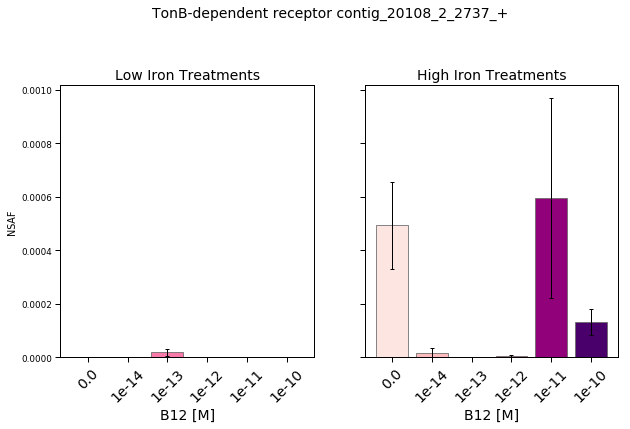

In [37]:
search = 'contig_20108_2_2737_+'
search_col = 'orf_id'
plot_errbar(search, search_col)

In [38]:
# Plot specific bar chart
# lo iron
ax1.bar(x=df_lo.index, height=df_lo['avg_mu'], yerr=df_lo['stdev'], 
       capsize=2, error_kw=dict(ecolor='dimgrey',elinewidth=1), color=b12colors, edgecolor='dimgray')
# hi iron
ax2.bar(x=df_hi.index, height=df_hi['avg_mu'], yerr=df_hi['stdev'], 
       capsize=2, error_kw=dict(ecolor='dimgrey',elinewidth=1), color=b12colors, edgecolor='dimgray')
# plot information
ax1.set_title('Low Iron Treatments', **style)
ax2.set_title('High Iron Treatments', **style)
#
ax1.ticklabel_format(axis="y")# style="sci", scilimits=(0,0))
ax2.ticklabel_format(axis="y")# style="sci", scilimits=(0,0))
#
ax1.set_xticklabels(df_lo.index, rotation=45, **style)
ax2.set_xticklabels(df_hi.index, rotation=45, **style)
ax1.set_xlabel('$B_{12}$ [M]',**style)
ax2.set_xlabel('$B_{12}$ [M]',**style)
ax1.set_ylabel('Growth rate (day$^{-1}$) \n Based on total cell counts',**style)

plt.savefig('/Users/Deepa/Documents/1_Publications/Figures_Lab_Paper/2023_test-x.pdf', format='pdf', dpi=600, bbox_inches='tight')

NameError: name 'ax1' is not defined

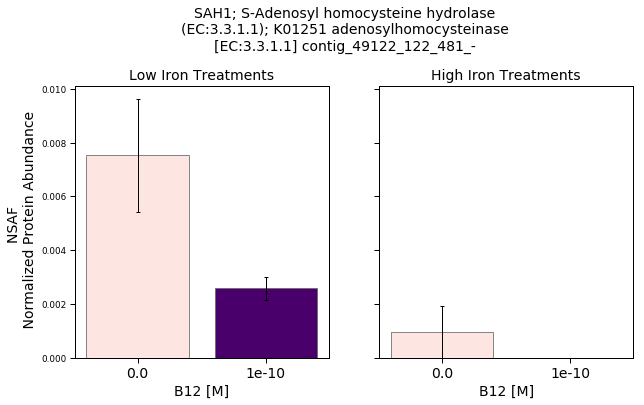

In [39]:
# Small ErrorBarPlot - plot specific contig of interest
search = 'contig_49122_122_481_-'
search_col = 'orf_id'
plot_errbar_sm(search, search_col)
plt.savefig('/Users/Deepa/Documents/1_Publications/Figures_Lab_Paper/SAH1-x.pdf', format='pdf', dpi=600, bbox_inches='tight')

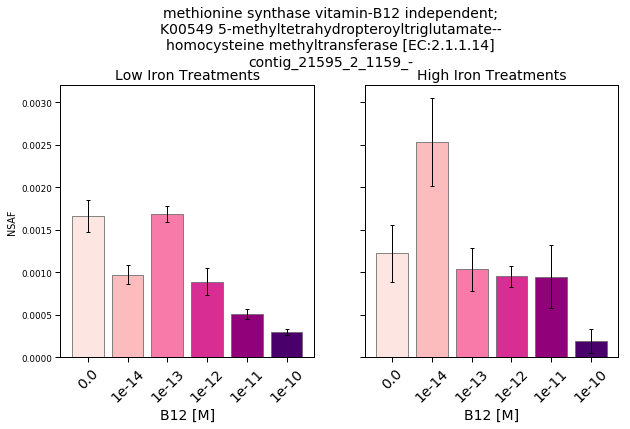

In [40]:
search = 'contig_21595_2_1159_-'
search_col = 'orf_id'
plot_errbar(search, search_col)

In [41]:
dfavg[dfavg.index.str.contains('b12|cobalamin', case=False, na=False)]

,orf_id,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem
stridex,,,,,,,,,,,,,,,,,,,,,
"_GAP_||Cobalamin-independent synthase, Catalytic domain||_GAP_||PF13738||Putative NAD(P)-binding||_GAP_",contig_16786_147_2921_-,0.000650,0.001395,0.000062,0.000376,0.000197,0.000000,0.001733,0.001663,0.001572,...,0.000062,0.000290,0.000101,0.000000,0.000033,0.000068,0.000171,0.000123,0.000110,0.000019
"CobW/HypB/UreG, nucleotide-binding domain||_GAP_||Cobalamin synthesis protein cobW C-terminal domain",contig_25542_1_663_+,0.003958,0.006468,0.005712,0.004412,0.005694,0.003892,0.001076,0.000437,0.000951,...,0.000797,0.000650,0.001919,0.001475,0.000146,0.000071,0.000134,0.000010,0.000037,0.000094
methionine synthase vitamin-B12 independent; K00549 5-methyltetrahydropteroyltriglutamate--homocysteine methyltransferase [EC:2.1.1.14],contig_21595_2_1159_-,0.001221,0.002527,0.001035,0.000951,0.000948,0.000195,0.001661,0.000973,0.001683,...,0.000255,0.000125,0.000367,0.000142,0.000188,0.000115,0.000097,0.000161,0.000056,0.000031
Cobalamin synthesis protein,contig_15181_294_1847_-,0.000014,0.000074,0.000000,0.000000,0.000000,0.000000,0.000154,0.000000,0.000133,...,0.000000,0.000000,0.000000,0.000000,0.000031,0.000000,0.000013,0.000071,0.000014,0.000040
"CobW/HypB/UreG, nucleotide-binding domain||_GAP_||Cobalamin synthesis protein cobW C-terminal domain",contig_52589_157_1167_+,0.000042,0.000028,0.000000,0.000045,0.000000,0.000014,0.000154,0.000182,0.000306,...,0.000000,0.000045,0.000000,0.000014,0.000036,0.000106,0.000107,0.000073,0.000140,0.000067
metH; B12 dependent methionine synthase (EC:2.1.1.13); K00548 5-methyltetrahydrofolate--homocysteine methyltransferase [EC:2.1.1.13],contig_51544_3_2534_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000002,0.000017,0.000014
cobalamin synthesis protein P47K,contig_13974_940_2271_-,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


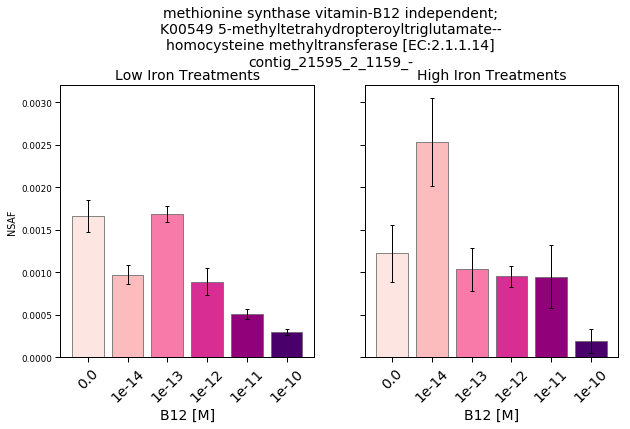

In [42]:
search = 'contig_21595_2_1159_-'
search_col = 'orf_id'
plot_errbar(search, search_col)

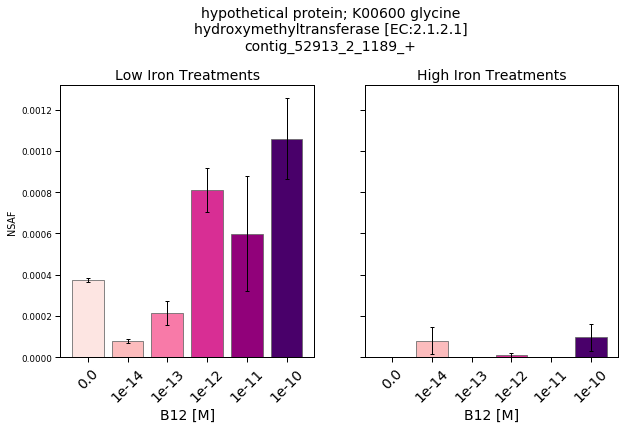

In [43]:
search = 'contig_52913_2_1189_+'
search_col = 'orf_id'
plot_errbar(search, search_col)

## Differentially Abundant Proteins (DAPs)
<a class="anchor" id="DAPS"></a>

### PLGEM Method
* fitCondition for all samples = lo_0B12
* baselineCondition = lo_0 for low Fe
* baselineCondition = hi_0 for high Fe
* delta = 0.05 (False Positive Rate = 5%)

Treat these experiments as:
1) B12 response
2) Fe-dependent/Morphotype-dependent B12 response


In [44]:
# Import DEPs from PLGEM, reference lo_0
#dep_hi_0_10 = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/plgem_0.05_lo0_ref/PLGEM_DR_2020_NSAF.csv_hi_10_vs_hi_0_0.05.txt',
#                          header=None, names=['orf_id'])

# Import DEPs from PLGEM, reference hi_0
dep_hi_0_10 = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/plgem_fit_lo0_p0.05_ref_hi0/PLGEM_DR_2020_NSAF.csv_hi_10_vs_hi_0_0.05.txt',
                          header=None, names=['orf_id'])
# Import DEPs from PLGEM, reference lo_0
dep_lo_0_10 = pd.read_csv('/Users/Deepa/Documents/2017_Lab_Research/Proteomics_Data/2020_Reanalysis_newassembly/aug2018_newassembly_final/plgem_fit_lo0_p0.05_ref_lo0/PLGEM_DR_2020_NSAF.csv_lo_10_vs_lo_0_0.05.txt',
                          header=None, names=['orf_id'])

print(dep_hi_0_10.shape,  dep_lo_0_10.shape);

(441, 1) (649, 1)


In [45]:
# Check if proteins of interst are in the DEPs
# metH: contig_51544_3_2534_+, contig_2344_867_3131_-, contig_14027_909_5177_-
# metE: contig_14470_3413_4480_+, contig_21595_2_1159_-
# cobalamin-indepdentn synthase catalytic domain: contig_16786_147_2921_-

dep_lo_0_10[dep_lo_0_10.orf_id.str.contains('contig_51544_3_2534_+', case=False, na=False)]


,orf_id
237,contig_51544_3_2534_+


## Scatter
<a class="anchor" id="plot-scatter"></a>
Scatterplot with annotation hover

In [46]:
# methyl|gluta|folate|quin
b12_pro = dfavg[dfavg.index.str.contains('b12|methionine|cob|cobalamin|methyl|SAM', case=False, na=False)]
cell_pro = dfavg[dfavg.index.str.contains('spondin|tubulin|actin|division|calmodulin', case=False, na=False)]
transport_pro = dfavg[dfavg.index.str.contains('tonb|ABC|transport|metal|uptake|transmembrane', case=False, na=False)]
tonb_pro = dfavg[dfavg.index.str.contains('tonb|exbb|exed', case=False, na=False)]
iron_pro = dfavg[dfavg.index.str.contains('tonb|exb|isip|flavo|ferre', case=False, na=False)]

In [47]:
# Bokeh + Pandas
# requires the ColumnDataSource Bokeh object
# Inveractive hover feature

output_file('hi_0_10_scatter-x.html')

# Variables & Labels
x_var = 'hi_10_avg'
y_var = 'hi_0_avg'
#
x_txt = '+B12'
y_txt = '-B12'

# data for scatter
dfs = dfavg #original dataset
dfs['protein'] = dfs.index #add a new column of the protein id
# Subset protein data with DEP list
deps_hi = pd.merge(dfs, dep_hi_0_10)
# Subset DEPS with B12 proteins
deps_hi_b12 = pd.merge(deps_hi, b12_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs)
source_dep = ColumnDataSource(deps_hi)
source_dep_b12 = ColumnDataSource(deps_hi_b12)

# PLOT FIGURE
p = figure(plot_width=600, plot_height=600,
           x_range=(-0.008,0.1), y_range=(-0.008,0.1),
           toolbar_location="right")
# 1:1 Line
p.line( x=[0,0.5],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 3)
p.line( x=[0,0.5],y=[0,1], 
       color='gray', line_dash='dashed', line_width = 2)
p.line( x=[0,1],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 2)


# Data
p.circle(x = x_var, y = y_var,
        source=source,
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = x_var, y = y_var,
        source=source_dep, legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = x_var, y = y_var,
        source=source_dep_b12,legend_label='B12-related proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)

# Figure details
p.title.text = 'High Iron Treatments'
p.xaxis.axis_label= x_txt
p.yaxis.axis_label= y_txt

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

show(p)

In [296]:
# Bokeh + Pandas
# requires the ColumnDataSource Bokeh object
# Inveractive hover feature

output_file('lo_0_10_scatter.html')

# Variables & Labels
x_var = 'lo_10_avg'
y_var = 'lo_0_avg'
#
x_txt = '+B12'
y_txt = '-B12'

# data for scatter
dfs = dfavg #original dataset
dfs['protein'] = dfs.index #add a new column of the protein id
# Subset protein data with DEP list
deps_lo = pd.merge(dfs, dep_lo_0_10)
# Subset DEPS with B12 proteins
deps_lo_b12 = pd.merge(deps_lo, b12_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs)
source_lo_dep = ColumnDataSource(deps_lo)
source_dep_lo_b12 = ColumnDataSource(deps_lo_b12)

# Plot Data!
p = figure(plot_width=600, plot_height=600,
        x_range=(-0.008,0.1), y_range=(-0.008,0.1),
        toolbar_location="right")
# 1:1 Line
p.line( x=[0,0.5],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 3)
p.line( x=[0,0.5],y=[0,1], 
       color='gray', line_dash='dashed', line_width = 2)
p.line( x=[0,1],y=[0,0.5], 
       color='gray', line_dash='dashed', line_width = 2)
# Data
p.circle(x = x_var, y = y_var, 
        source=source,
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = x_var, y = y_var,
        source=source_lo_dep, legend_label='DAPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = x_var, y = y_var,
        source=source_dep_lo_b12, legend_label='B12 proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)

p.title.text = 'High Iron Treatments'
p.xaxis.axis_label= x_txt
p.yaxis.axis_label= y_txt

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

show(p)

## MA Plot
<a class="anchor" id="plot-ma"></a>

An M-A plot is a comparison between two treatments A & B

**x-axis**: log2 average normalized spectral counts of treatments A & B
**y-axis**: log2 fold change in normalized spectral counts of treatments A & B

### Calculate Fold Change
<a class="anchor" id="fold-change"></a>
1. Calculate mean of A & B
2. Calculate log2 fold change of A and B

In [48]:
# lo iron: 0 vs 10
ma_lo = dfavg.loc[:,['protein', 'orf_id', 'lo_0_avg', 'lo_10_avg']] #create new df
# calculate average of comparisons
ma_lo['lo_0_10_avg'] = dfavg.loc[:,['lo_0_avg', 'lo_10_avg']].mean(axis=1)
# log2 average abundance
ma_lo['l2avg_lo_0_10'] = np.log2(ma_lo['lo_0_10_avg'])
# log2 fold change
ma_lo['l2fc_lo_0_10'] = np.log2(ma_lo['lo_10_avg']/ma_lo['lo_0_avg'])

ma_lo.head();

# hi iron: 0 vs 10
ma_hi = dfavg.loc[:,['protein', 'orf_id', 'hi_0_avg', 'hi_10_avg']] #create new df
# calculate average of comparisons
ma_hi['hi_0_10_avg'] = dfavg.loc[:,['hi_0_avg', 'hi_10_avg']].mean(axis=1)
# log2 average abundance
ma_hi['l2avg_hi_0_10'] = np.log2(ma_hi['hi_0_10_avg'])
# log2 fold change
ma_hi['l2fc_hi_0_10'] = np.log2(ma_hi['hi_10_avg']/ma_hi['hi_0_avg'])

ma_hi.head();

/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log2
  
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log2
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log2
/Users/Deepa/anaconda/envs/ciclops/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2


ma_lo.columns.values

In [49]:
# MA Plot
output_file('MA_lo_0_10-x.html')

# data for scatter
dfs_lo = ma_lo #original dataset
dfs_lo['protein'] = dfs_lo.index #add a new column of the protein id
#dfs.drop('stridex', axis=1, inplace=True)

# Subset protein data with DEP list
deps_lo = pd.merge(dfs_lo, dep_lo_0_10)
# Subset DEPS with B12 proteins
deps_lo_b12 = pd.merge(deps_lo, b12_pro)
# Subset DEPS with cell cycle proteins
deps_lo_cell = pd.merge(deps_lo, cell_pro)
# Subset DEPS with cell cycle proteins
deps_lo_trans = pd.merge(deps_lo, transport_pro)
# Subset DEPS with iron response
deps_lo_iron = pd.merge(deps_lo, iron_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs_lo)
source_dep = ColumnDataSource(deps_lo)
source_dep_b12 = ColumnDataSource(deps_lo_b12)
source_dep_cell = ColumnDataSource(deps_lo_cell)
source_dep_trans = ColumnDataSource(deps_lo_trans)
source_dep_iron = ColumnDataSource(deps_lo_iron)

# PLOT
p = figure(plot_width=900, plot_height=900,
           toolbar_location="below")
# 1:1 Line
p.line( x=[-18,-4],y=[0,0], 
       color='gray', line_dash='dashed', line_width=3,
       legend_label='1:1')
# Data
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source, legend_label='0 vs 10 B12',
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source_dep,  legend_label='DEPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS B12-related
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source_dep_b12, legend_label='B12-related proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)

# DEPS Cell Cycle
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source_dep_cell, legend_label='cell cycle',
        fill_color='yellowgreen', line_color='olivedrab',
        alpha=0.7, size=10)

# DEPS Iron
p.circle(x = 'l2avg_lo_0_10', y = 'l2fc_lo_0_10',
        source=source_dep_iron, legend_label='iron',
        fill_color='teal', line_color='darkslategray',
        alpha=0.7, size=10)

# Plot aesthetics
p.title.text = 'Low Iron Treatments'
p.xaxis.axis_label='Log2 Average NSAF (+B12/-B12)'
p.yaxis.axis_label='Log2 FC NSAF (+B12/-B12)'

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

show(p)

In [625]:
# MA Plot
output_file('MA_hi_0_10.html')

# data for scatter
dfs_hi = ma_hi #original dataset
dfs_hi['protein'] = dfs_hi.index #add a new column of the protein id
#dfs.drop('stridex', axis=1, inplace=True)

# Subset protein data with DEP list
deps_hi = pd.merge(dfs_hi, dep_hi_0_10)
# Subset DEPS with B12 proteins
deps_hi_b12 = pd.merge(deps_hi, b12_pro)
# Subset DEPS with cell cycle proteins
deps_hi_trans = pd.merge(deps_hi, transport_pro)
# Subset DEPS with iron response
deps_hi_iron = pd.merge(deps_hi, iron_pro)

#df = dfs.sample(50) subsample data for test plot
source = ColumnDataSource(dfs_hi)
source_dep = ColumnDataSource(deps_hi)
source_dep_b12 = ColumnDataSource(deps_hi_b12)
source_dep_trans = ColumnDataSource(deps_hi_trans)
source_dep_iron = ColumnDataSource(deps_hi_iron)


# PLOT
p = figure(plot_width=900, plot_height=900,
           toolbar_location="below")
# 1:1 Line
p.line( x=[-18,-4],y=[0,0], 
       color='gray', line_dash='dashed', line_width=3,
       legend_label='1:1')
# Data
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source, legend_label='0 vs 10 B12',
        fill_color='silver', line_color='gray',
        size=10, alpha=0.8)
# DEPS
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source_dep,  legend_label='DEPs',
        fill_color='orange', line_color='darkorange',
        size=10, alpha=0.8)
# DEPS_B12
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source_dep_b12, legend_label='B12-related proteins',
        fill_color='magenta', line_color='darkmagenta',
        alpha=0.7, size=10)
# DEPS Iron
p.circle(x = 'l2avg_hi_0_10', y = 'l2fc_hi_0_10',
        source=source_dep_iron, legend_label='iron',
        fill_color='teal', line_color='darkslategray',
        alpha=0.7, size=10)

# Plot aesthetics
p.title.text = 'High Iron Treatments'
p.xaxis.axis_label='Log2 Average NSAF (+B12/-B12)'
p.yaxis.axis_label='Log2 FC NSAF (+B12/-B12)'

hover = HoverTool()
hover.tooltips=[
    ('Protein', '@protein'),
    ('ORF_ID', '@orf_id')]

p.add_tools(hover)

show(p)

In [227]:
deps_lo_b12.head()

,protein,orf_id,lo_0_avg,lo_10_avg,lo_0_10_avg,l2avg_lo_0_10,l2fc_lo_0_10,hi_0_avg,hi_14_avg,hi_13_avg,...,hi_12_std,hi_11_std,hi_10_std,lo_0_std,lo_14_std,lo_13_std,lo_12_std,lo_11_std,lo_10_std,lo_0_10
0,AMS1; probable S-adenosylmethionine synthetase...,contig_42239_3_1136_-,0.004858,0.001735,0.003297,-8.244842,-1.485136,0.002638,0.003774,0.003121,...,0.001500,0.002400,0.000907,0.000018,0.000986,0.000315,0.000716,0.001563,0.000294,0.003297
1,"_GAP_||Cobalamin-independent synthase, Catalyt...",contig_16786_147_2921_-,0.001733,0.000060,0.000897,-10.123395,-4.854658,0.000650,0.001395,0.000062,...,0.000502,0.000175,0.000000,0.000046,0.000118,0.000296,0.000213,0.000190,0.000032,0.000897
2,AMS1; probable S-adenosylmethionine synthetase...,contig_37275_134_436_-,0.001827,0.000096,0.000961,-10.022732,-4.251963,0.000049,0.000151,0.000000,...,0.000246,0.000000,0.000000,0.000339,0.001083,0.000179,0.001586,0.000551,0.000104,0.000961
3,metH; B12 dependent methionine synthase (EC:2....,contig_51544_3_2534_+,0.000000,0.000197,0.000098,-13.310461,inf,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000035,0.000000,0.000000,0.000000,0.000004,0.000029,0.000025,0.000098
4,_GAP_||Homocysteine S-methyltransferase||_GAP_,contig_18937_384_1952_+,0.000000,0.000330,0.000165,-12.565708,inf,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000086,0.000000,0.000000,0.000000,0.000000,0.000126,0.000051,0.000165


In [50]:
deps_lo_b12[deps_lo_b12.protein.str.contains('b12|methionine|cob|cobalamin|methyl|SAM|corrin', case=False, na=False)];
deps_lo_b12[deps_lo_b12.protein.str.contains('TgMTP1', case=False, na=False)]

,protein,orf_id,lo_0_avg,lo_10_avg,lo_0_10_avg,l2avg_lo_0_10,l2fc_lo_0_10,hi_0_avg,hi_14_avg,hi_13_avg,...,hi_13_sem,hi_12_sem,hi_11_sem,hi_10_sem,lo_0_sem,lo_14_sem,lo_13_sem,lo_12_sem,lo_11_sem,lo_10_sem


In [53]:
dfavg.describe()

,hi_0_avg,hi_14_avg,hi_13_avg,hi_12_avg,hi_11_avg,hi_10_avg,lo_0_avg,lo_14_avg,lo_13_avg,lo_12_avg,...,hi_13_std,hi_12_std,hi_11_std,hi_10_std,lo_0_std,lo_14_std,lo_13_std,lo_12_std,lo_11_std,lo_10_std
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,...,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,-0.000669,-0.000608,-0.000517,-0.000486,-0.000517,-0.000486,-0.000593,-0.000669,-0.000547,-0.000274,...,0.000184,0.000456,0.000372,0.000394,0.000120,0.000134,0.000062,0.000470,0.000320,0.000146
std,0.029141,0.028928,0.027738,0.024908,0.025927,0.025998,0.028801,0.029257,0.028665,0.019305,...,0.003309,0.011054,0.007829,0.010147,0.003906,0.003200,0.000217,0.013121,0.009549,0.003197
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.777778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000023,0.000000,0.000000
75%,0.000028,0.000040,0.000000,0.000025,0.000000,0.000024,0.000092,0.000034,0.000144,0.000130,...,0.000000,0.000040,0.000000,0.000041,0.000034,0.000031,0.000053,0.000089,0.000055,0.000071
max,0.034801,0.049880,0.103476,0.055063,0.075390,0.084621,0.034951,0.030336,0.021440,0.030288,...,0.192450,0.509175,0.384900,0.577350,0.235702,0.192450,0.008988,0.577350,0.509175,0.192450
